In [2]:
import re # regex
import pandas as pd # tables
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import numpy as np # operations with arrays and matrices 
import tensorflow as tf

                                               Lines Emotions
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...    trust
4                               i am feeling grouchy    anger


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


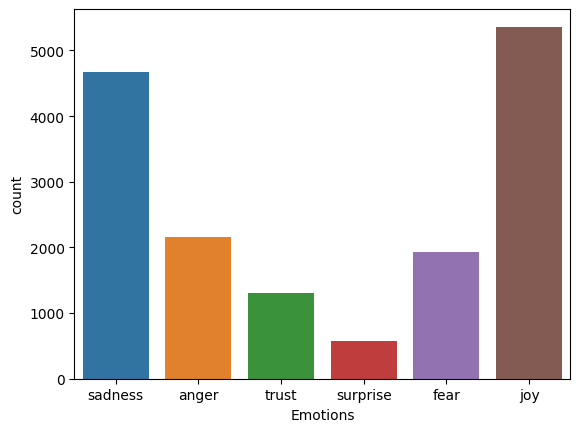

In [3]:
# reading the dataset 
train = pd.read_csv('final_train.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')
test = pd.read_csv('final_test.txt', header=None, sep =';', names=['Lines','Emotions'], encoding='utf-8')
validation = pd.read_csv('final_val.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')

train['Emotions'] = train['Emotions'].replace('love', 'trust')
test['Emotions'] = test['Emotions'].replace('love', 'trust')
validation['Emotions'] = validation['Emotions'].replace('love', 'trust')

print(train.head())
sns.countplot(train, x='Emotions')
plt.show()

In [4]:
# adding a column with encoded emotions
emotions_to_labels = {'anger': 0, 'trust': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}

train['Labels'] = train['Emotions'].replace(emotions_to_labels)
test['Labels'] = test['Emotions'].replace(emotions_to_labels)
validation['Labels'] = validation['Emotions'].replace(emotions_to_labels)

In [5]:
train.head()

,Lines,Emotions,Labels
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,trust,1
4,i am feeling grouchy,anger,0


In [6]:
def visualize_labels_distribution(df, title='the'):
  '''
  Accepts a dataframe with 'Emotions' column and dataset title (e.g. 'train')
  Creates bar chart with num of elements of each category
  Returns nothing

  '''
  # create a pandas series with labels and their counts
  num_labels = df['Emotions'].value_counts()

  # num of unique categories
  x_barchart = range(df['Emotions'].nunique())
  # list of labels
  x_barchart_labels = [str(emotions_to_labels[emotion]) +\
                       ' - ' + emotion for emotion in list(num_labels.index)]

  # list of counts
  y_barchart = list(num_labels.values)

  # creating bar chart
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # adding num of elements for each category on plot as text
  for index, data in enumerate(y_barchart):
    plt.text(x = index, 
            y = data+max(y_barchart)/100, 
            s = '{}'.format(data), 
            fontdict = dict(fontsize=10), 
            ha = 'center',)
  
  plt.xticks(x_barchart, x_barchart_labels, rotation=40)
  plt.title('Num of elements of each category for {} dataset'.format(title))
  plt.tight_layout()

  print('There are {} records in the dataset.\n'.format(len(df.index)))

  plt.show()

There are 16000 records in the dataset.



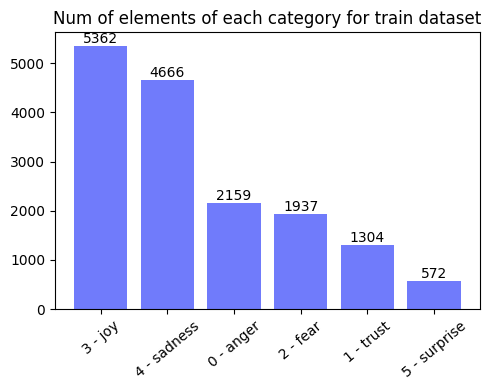

There are 2000 records in the dataset.



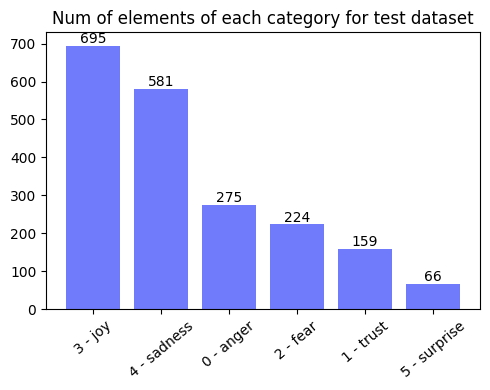

There are 2000 records in the dataset.



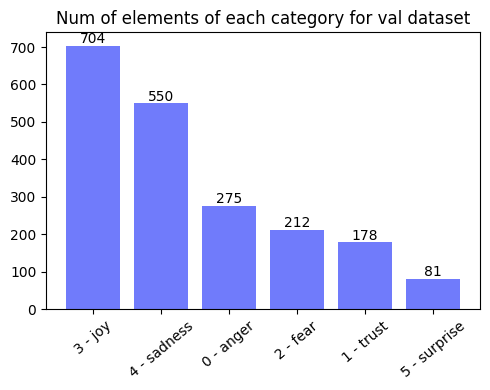

In [7]:
visualize_labels_distribution(train, 'train')
visualize_labels_distribution(test, 'test')
visualize_labels_distribution(validation, 'val')

In [8]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# downloading a set of stop-words
STOPWORDS = set(stopwords.words('english'))

# tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [9]:
def text_preprocess(text, stop_words=False):
  '''
  Accepts text (a single string) and
  a parameters of preprocessing
  Returns preprocessed text

  '''
  # clean text from non-words
  text = re.sub(r'\W+', ' ', text).lower()

  # tokenize the text
  tokens = word_tokenize(text)

  if stop_words:
    # delete stop_words
    tokens = [token for token in tokens if token not in STOPWORDS]

  return tokens

In [10]:
print('Before: ')
print(train.head())

x_train = [text_preprocess(t, stop_words=True) for t in train['Lines']]
y_train = train['Labels'].values

print('\nAfter:')
for line_and_label in list(zip(x_train[:5], y_train[:5])):
  print(line_and_label)

Before: 
                                               Lines Emotions  Labels
0                            i didnt feel humiliated  sadness       4
1  i can go from feeling so hopeless to so damned...  sadness       4
2   im grabbing a minute to post i feel greedy wrong    anger       0
3  i am ever feeling nostalgic about the fireplac...    trust       1
4                               i am feeling grouchy    anger       0

After:
(['didnt', 'feel', 'humiliated'], 4)
(['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], 4)
(['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], 0)
(['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], 1)
(['feeling', 'grouchy'], 0)


In [11]:
x_test = [text_preprocess(t, stop_words=True) for t in test['Lines']]
y_test = test['Labels'].values

x_validation = [text_preprocess(t, stop_words=True) for t in validation['Lines']]
y_validation = validation['Labels'].values

# WORD EMBEDDINGS


In [12]:
# load pre-trained model
import gensim.downloader as api
model_wiki = api.load('fasttext-wiki-news-subwords-300')

from gensim.models import Word2Vec

# train word2vec model on the corpus
model_w2v = Word2Vec(x_train + x_test + x_validation,   # data for model to train on
                 vector_size = 300,                            # embedding vector size
                 min_count = 2).wv  

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

DICT_SIZE = 15000

# creating a dictionary with most used words
# where num of words = DICT_SIZE
tokenizer = Tokenizer(num_words=DICT_SIZE)
total = x_train + x_train + x_validation
tokenizer.fit_on_texts(total)

In [14]:
# words and their indexes
list(tokenizer.word_index.items())[:5]

[('feel', 1), ('feeling', 2), ('like', 3), ('im', 4), ('really', 5)]

In [15]:
# number of unique words in the corpus
len(tokenizer.word_index)

16045

In [16]:
# find max length of sentences across all parts of the dataset
x_train_max_len = max([len(i) for i in x_train])
x_test_max_len = max([len(i) for i in x_test])
x_validation_max_len = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_len, x_test_max_len, x_validation_max_len)

In [17]:
MAX_LEN

35

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# replace words with their indexes, 
# change size of vectors to MAX_LEN and pad indexes 
X_train = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN)

X_val = tokenizer.texts_to_sequences(x_validation)
X_val_pad = pad_sequences(X_val, maxlen=MAX_LEN)

# words are replaced by their indexes
X_train[0]

[51, 1, 556]

In [19]:
# sentence after padding
X_train_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  51,   1, 556], dtype=int32)

In [20]:
def create_weight_matrix(model, second_model=False):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_vector('like').shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.key_to_index: 
        w_matrix[index] = model.get_vector(word)
      else:
        if second_model:
          if word in second_model.key_to_index:
            w_matrix[index] = second_model.get_vector(word)
          else:
            skipped_words.append(word)
        else:
          skipped_words.append(word)
 
  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  return w_matrix

In [21]:
weight_matrix = create_weight_matrix(model_wiki, model_w2v)

991 words were skipped. Some of them:
['jacynthe', 'rupaul', 'kayle', 'gerling', 'mxm', 'dannika', 'hyperchondria', 'manitz', 'educationg', 'gosman', 'montauk', 'bummin', 'wheeeeee', 'underwears', 'olivias', 'bandhu', 'uplifter', 'suicidalness', 'dykey', 'provokingbeauty', 'bodypump', 'honkerblonked', 'clermont', 'instructables', 'janne', 'suominen', 'kamiki', 'nozomi', 'nonchan', 'beaubronz', 'docrat', 'allthingsbucks', 'irresponcible', 'scruncher', 'utf', 'isprivate', 'ismobile', 'mobileclass', 'isprivateblog', 'languagedirection', 'feedlinks', 'lorena', 'handss', 'nervs', 'mommyhood', 'nowwwwww', 'whitleys', 'forelorn', 'baachan', 'covingtons']


In [22]:
weight_matrix.shape

(15000, 300)

In [23]:
# import models, layers, optimizers from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
# import and initialize early stopping
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [25]:
# initialize sequential model
model = Sequential()
model.add(Embedding(input_dim = DICT_SIZE, # the whole vocabulary size
                    output_dim = weight_matrix.shape[1], # vector space dimension
                    input_length = X_train_pad.shape[1], # max_len of text sequence
                    weights=[weight_matrix], # assign the embedding weight with embedding marix
                    trainable=False)) # set the weight to be not trainable (static)

In [26]:
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [27]:
history = model.fit(X_train_pad, y_train, 
                    validation_data = (X_val_pad, y_validation),
                    batch_size = 8,
                    epochs = 20, 
                    callbacks = stop)

Epoch 1/20
2000/2000 [==============================] - 162s 80ms/step - loss: 0.8786 - accuracy: 0.6837 - val_loss: 0.3144 - val_accuracy: 0.8880
Epoch 2/20
2000/2000 [==============================] - 161s 80ms/step - loss: 0.2412 - accuracy: 0.9096 - val_loss: 0.1835 - val_accuracy: 0.9285
Epoch 3/20
2000/2000 [==============================] - 169s 84ms/step - loss: 0.1642 - accuracy: 0.9288 - val_loss: 0.1739 - val_accuracy: 0.9270
Epoch 4/20
2000/2000 [==============================] - 154s 77ms/step - loss: 0.1389 - accuracy: 0.9334 - val_loss: 0.1411 - val_accuracy: 0.9335
Epoch 5/20
2000/2000 [==============================] - 155s 77ms/step - loss: 0.1263 - accuracy: 0.9366 - val_loss: 0.1313 - val_accuracy: 0.9355
Epoch 6/20
2000/2000 [==============================] - 158s 79ms/step - loss: 0.1146 - accuracy: 0.9410 - val_loss: 0.1220 - val_accuracy: 0.9345
Epoch 7/20
2000/2000 [==============================] - 378s 189ms/step - loss: 0.1068 - accuracy: 0.9428 - val_loss: 

In [28]:
# Save the model
model.save('BI-LSTM')

# # Load the model
# loaded_model = tf.keras.models.load_model('model_directory_path')

INFO:tensorflow:Assets written to: BI-LSTM/assets


INFO:tensorflow:Assets written to: BI-LSTM/assets


In [29]:
def plot_history(history):
    '''
    Plots training and validation accuracy and loss
    Accepts a single param - history, where
    history - keras.callbacks.History object
    Returns nothing
    
    '''
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, label='Training acc', color='#707bfb')
    plt.plot(x, val_accuracy, label='Validation acc', color='#fbcbff')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss', color='#707bfb')
    plt.plot(x, val_loss, label='Validation loss', color='#fbcbff')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.legend()

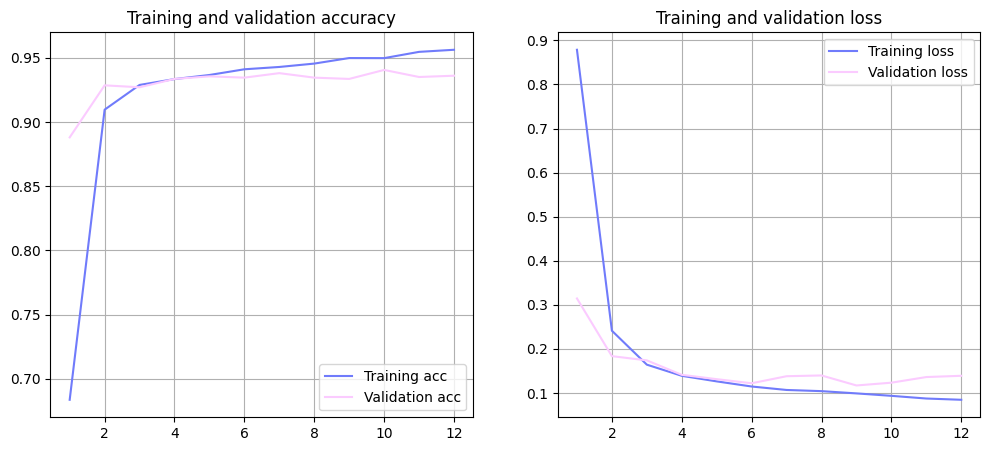

In [30]:
plot_history(history)

In [31]:
model.evaluate(X_test_pad, y_test) 
y_pred = np.argmax(model.predict(X_test_pad), axis=1)

63/63 [==============================] - 3s 35ms/step


In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       275
           1       0.86      0.81      0.83       159
           2       0.91      0.83      0.87       224
           3       0.94      0.96      0.95       695
           4       0.95      0.97      0.96       581
           5       0.69      0.92      0.79        66

    accuracy                           0.92      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.93      0.92      0.92      2000



In [33]:
# setting a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

In [34]:
def plot_confusion_matrix(matrix, fmt=''):
  '''
  Accepts a confusion matrix and a format param
  Plots the matrix as a heatmap
  Returns nothing

  '''
  plt.figure(figsize=(9, 8))
  sns.heatmap(matrix, annot=True, 
              cmap=cmap, 
              fmt=fmt, 
              xticklabels=emotions_to_labels.keys(), 
              yticklabels=emotions_to_labels.keys())
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()

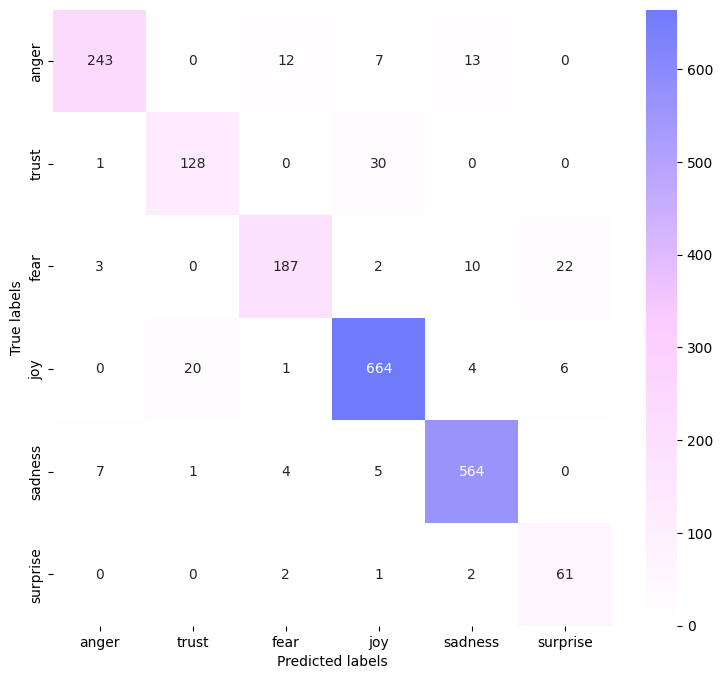

In [35]:
matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix)

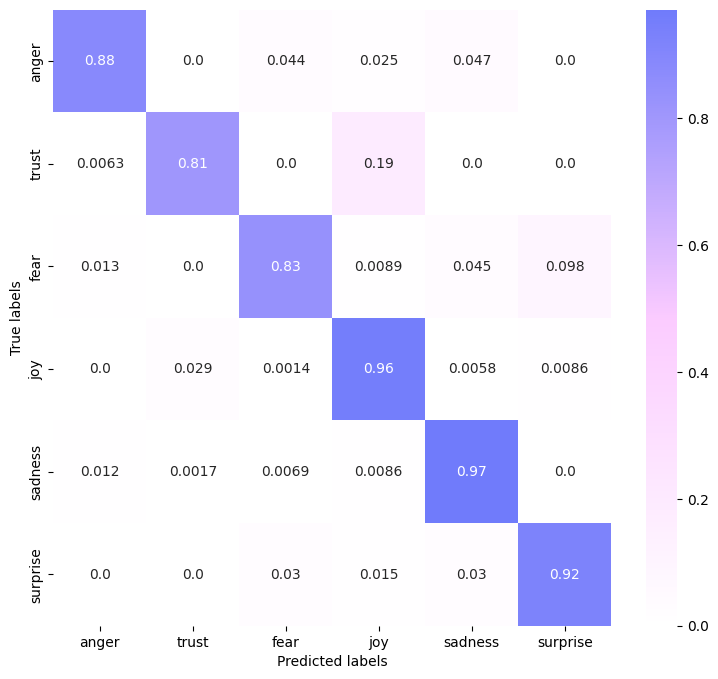

In [36]:
# create new confusion matrix
# where values are normed by row
matrix_new = np.zeros(matrix.shape)

for row in range(len(matrix)):
  sum = np.sum(matrix[row])
  for element in range(len(matrix[row])):
    matrix_new[row][element] = matrix[row][element] / sum

plot_confusion_matrix(matrix_new, fmt='.2')

In [37]:
def plot_result(result):
    sns.barplot(x = 'Category', y = 'Confidence', data = result)
    plt.xlabel('Categories', size=14)
    plt.ylabel('Confidence', size=14)
    plt.title('Emotion Classification', size=16)

In [38]:
# def bi_lstm_inference_encode(data,maximum_length) :
#     input_ids = []
#     attention_masks = []
  

  
#     encoded = tokenizer.encode_plus(
#     data,
#     add_special_tokens=True,
#     max_length=maximum_length,
#     pad_to_max_length=True,

#     return_attention_mask=True

#     )

#     input_ids.append(encoded['input_ids'])
#     attention_masks.append(encoded['attention_mask'])
#     return np.array(input_ids),np.array(attention_masks)

In [39]:
# def inference(text_sentence, max_len):
#     preprocessed_text = text_preprocess(text_sentence)
#     input_ids, attention_masks = bi_lstm_inference_encode(preprocessed_text, maximum_length = max_len)
#     # model = create_model(roberta_model, 43)
#     model = Sequential()
#     # model.load_weights('my_checkpoint')
#     model.load_weights('BI-LSTM')
#     result = model.predict([input_ids, attention_masks])
#     #le.categories_[0] = ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']
#     result = pd.DataFrame(dict(zip(list(le.categories_[0]), [round(x*100, 2)for x in result[0]])).items(), columns = ['Category', 'Confidence'])
#     plot_result(result)
#     return result

In [40]:
from sklearn import preprocessing
le = preprocessing.OneHotEncoder()
y_train= le.fit_transform(np.array(train['Emotions']).reshape(-1, 1)).toarray()
y_test= le.fit_transform(np.array(test['Emotions']).reshape(-1, 1)).toarray()
y_val= le.fit_transform(np.array(validation['Emotions']).reshape(-1, 1)).toarray()

In [41]:

def predict(texts):
    '''
    Accepts an array of texts (strings)
    Prints the sentence and the corresponding labels (emotions)
    Returns a DataFrame with the predicted labels and confidences for all emotions
    '''

    # Define the threshold for label activation
    threshold = 0.5

    texts_prepr = [text_preprocess(t) for t in texts]
    sequences = tokenizer.texts_to_sequences(texts_prepr)
    pad = pad_sequences(sequences, maxlen=MAX_LEN)

    predictions = model.predict(pad)

    # Initialize a list of all possible emotions
    all_emotions = list(labels_to_emotions.values())

    # Create a list to store individual DataFrames for each text
    result_dfs = []


    for i, preds in enumerate(predictions):
        # Create a dictionary to store the confidences for all emotions
        confidence_dict = {emotion: 0.0 for emotion in all_emotions}

        # Find labels where the probability exceeds the threshold
        active_labels = [idx for idx, prob in enumerate(preds) if prob >= threshold]
        predicted_emotions = [labels_to_emotions[idx] for idx in active_labels]

        # Update the confidence_dict with the confidences for the predicted emotions
        for idx, prob in enumerate(preds):
            emotion = labels_to_emotions[idx]
            confidence_dict[emotion] = round(prob*100, 2)

        # Create a DataFrame for the current text
        text_df = pd.DataFrame({'Text': [texts[i]], **confidence_dict})

        # Append the DataFrame to the list
        result_dfs.append(text_df)

        print(f'\'{texts[i]}\' --> {predicted_emotions}')

    # Concatenate all individual DataFrames into one result DataFrame
    result = pd.concat(result_dfs, ignore_index=True)

    return result


In [76]:
from pyplutchik import plutchik

# Test the predict function with a list of texts
test_texts = ['I am deeply connected with this person']
result_df = predict(test_texts)
print(result_df)


1/1 [==============================] - 0s 15ms/step
'I think a car was following me today. I was so scared and then I realized it was just my friend' --> ['fear']
                                                Text  anger  trust   fear  \
0  I think a car was following me today. I was so...   0.29   0.01  97.77   

   joy  sadness  surprise  
0  0.1     1.81      0.02  


<AxesSubplot: >

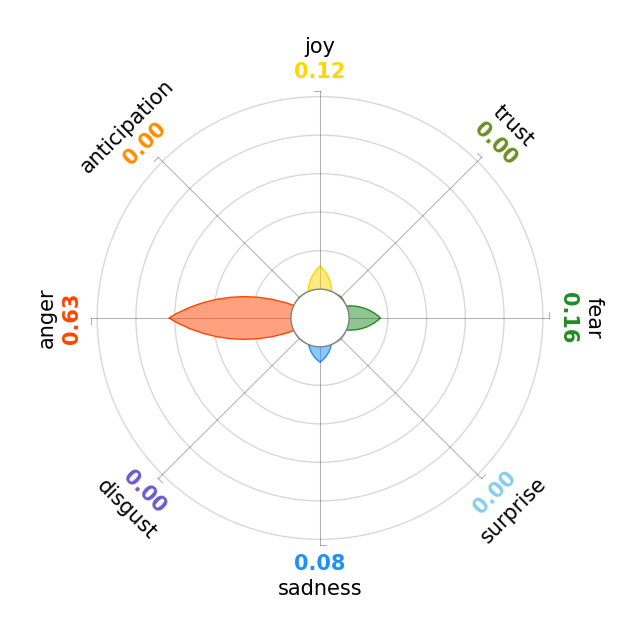

In [67]:

text_column = result_df['Text']
emotion_columns = result_df.drop(columns=['Text'])
score = 0

emotion_list = emotion_columns.to_dict(orient='records')

emotions = {}
for i, text in enumerate(text_column):
    emotions[text] = emotion_list[i]

combined_emotions = {'disgust': 0, 'anticipation': 0}


for emotion_dict in emotion_list:
    for emotion, confidence in emotion_dict.items():
        if emotion not in combined_emotions:
            combined_emotions[emotion] = confidence / 100.0
        else:
            combined_emotions[emotion] += confidence / 100.0


num_texts = len(emotion_list)
for emotion in combined_emotions:
    combined_emotions[emotion] /= num_texts

# 
text_column = result_df['Text']
emotions_columns = result_df.drop(columns=['Text'])
score = 0

emotion_list = emotion_columns.to_dict(orient='records')

emotions = {}
for i, text in enumerate(text_column):
    emotions[text] = emotion_list[i]

combined_emotions = {'disgust': 0, 'anticipation': 0}
# combined_emotions['anticipation'] = 0.0

plutchik(combined_emotions)



In [44]:
def predict_another(texts):
  '''
  Accepts array if texts (strings)
  Prints sentence and the corresponding label (emotion)
  Returns nothing
  
  '''
  texts_prepr = [text_preprocess(t) for t in texts]
  sequences = tokenizer.texts_to_sequences(texts_prepr)
  pad = pad_sequences(sequences, maxlen=MAX_LEN)

  predictions = model.predict(pad)
  labels = np.argmax(predictions, axis=1)
  
  for i, lbl in enumerate(labels):
    print(f'\'{texts[i]}\' --> {labels_to_emotions[lbl]}')


<AxesSubplot: >

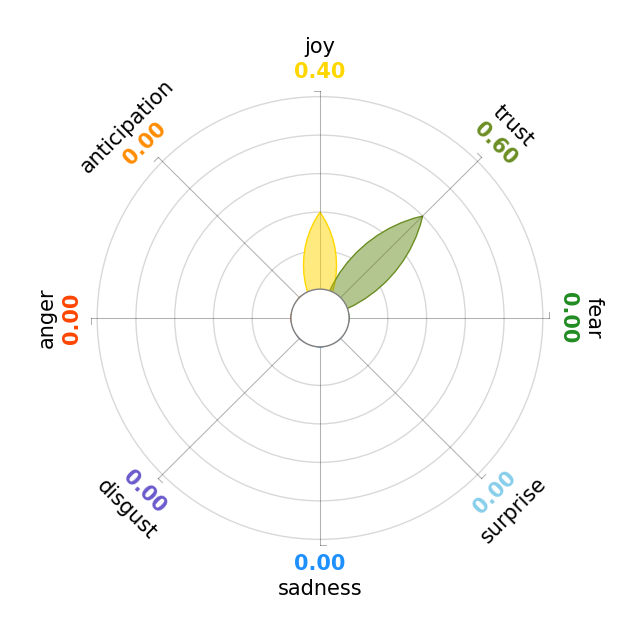

In [2]:
from pyplutchik import plutchik

emotions = {'joy': 0.4,
            'trust': 0.6,
            'fear': 0.0,
            'surprise': 0.0,
            'sadness': 0.0,
            'disgust': 0.0,
            'anger': 0.0,
            'anticipation': 0.0}
            
plutchik(emotions)

<AxesSubplot: >

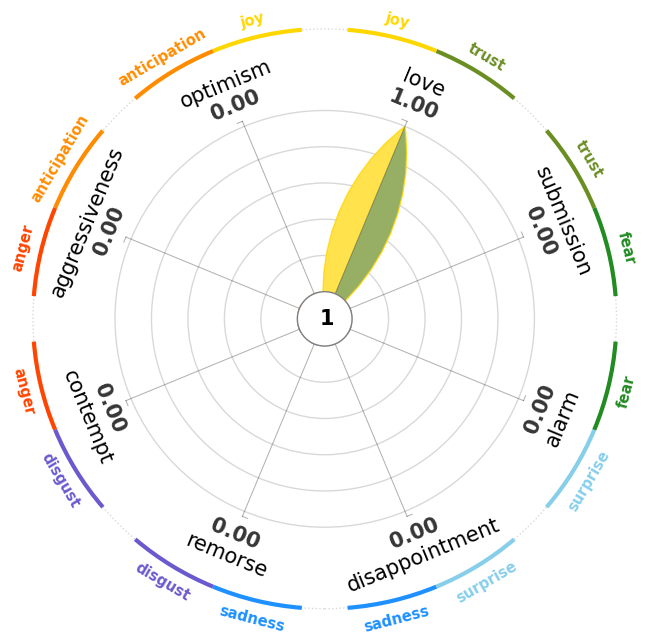

In [5]:
primary_dyads = {
    'love' : 1,
    'submission' : 0.0,
    'alarm' : .0,
    'disappointment': .0,
    'remorse' : .0,
    'contempt' : .0,
    'aggressiveness' : .0,
    'optimism' : .0
}

plutchik(primary_dyads)

<AxesSubplot: >

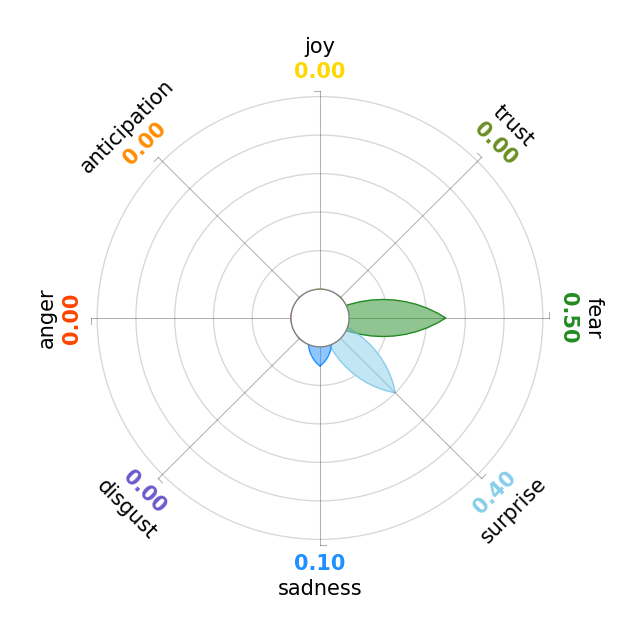

In [6]:
from pyplutchik import plutchik

emotions = {'joy': 0.0,
            'trust': 0.0,
            'fear': 0.5,
            'surprise': 0.4,
            'sadness': 0.1,
            'disgust': 0.0,
            'anger': 0.0,
            'anticipation': 0.0}
            
plutchik(emotions)

<AxesSubplot: >

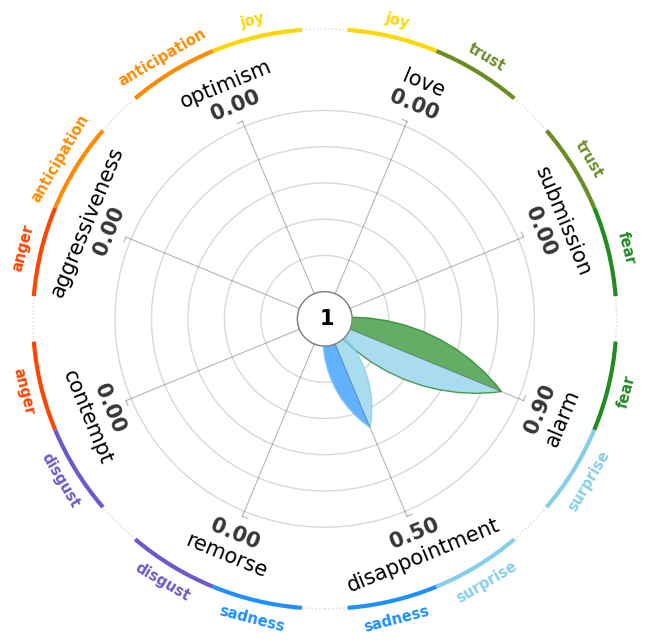

In [8]:
primary_dyads = {
    'love' : 0,
    'submission' : 0.0,
    'alarm' : .9,
    'disappointment': .5,
    'remorse' : .0,
    'contempt' : .0,
    'aggressiveness' : .0,
    'optimism' : .0
}
plutchik(primary_dyads)

In [45]:
test_texts = ['I am so happy', 'The man felt lonely', 'The guests felt satisfied']

predict_another(test_texts)

1/1 [==============================] - 0s 39ms/step
'I am so happy' --> joy
'The man felt lonely' --> sadness
'The guests felt satisfied' --> joy


LOAD MODEL

In [46]:
loaded_model = tf.keras.models.load_model('BI-LSTM')
# loaded_model.load_weights('BI-LSTM')


In [47]:
loaded_model